# Hierarchical Clustering

Hierarchical Clustering is a type of unsupervised learning algorithm used to group similar data points into clusters. It builds a hierarchy of clusters and is particularly useful when the number of clusters is not known in advance.

## Types of Hierarchical Clustering

There are two main types of hierarchical clustering:

1. **Agglomerative (Bottom-Up) Clustering:**
   - Starts with each data point as a separate cluster.
   - Iteratively merges the closest pairs of clusters until only one cluster remains or a stopping criterion is met.
   - Commonly used due to its simplicity and effectiveness.

2. **Divisive (Top-Down) Clustering:**
   - Starts with a single cluster containing all data points.
   - Iteratively splits the clusters into smaller clusters until each cluster contains only one data point or a stopping criterion is met.
   - Less commonly used due to its computational complexity.

## How Agglomerative Hierarchical Clustering Works

1. **Initialization:**
   - Start with $N$ clusters, each containing one data point.

2. **Merge Clusters:**
   - Calculate the distance between all pairs of clusters.
   - Merge the two clusters that are closest to each other.

3. **Update Distances:**
   - Recalculate the distances between the new cluster and all other clusters.

4. **Repeat:**
   - Repeat steps 2 and 3 until only one cluster remains or a desired number of clusters is obtained.

## Distance Measures

The distance between clusters can be calculated using various methods, including:

1. **Single Linkage (Minimum Distance):**
   - The distance between two clusters is the minimum distance between any two points in the clusters.

2. **Complete Linkage (Maximum Distance):**
   - The distance between two clusters is the maximum distance between any two points in the clusters.

3. **Average Linkage:**
   - The distance between two clusters is the average distance between all pairs of points in the clusters.

4. **Centroid Linkage:**
   - The distance between two clusters is the distance between their centroids.

## Dendrogram

A dendrogram is a tree-like diagram that records the sequences of merges or splits. It helps visualize the hierarchical structure of the clusters and decide the number of clusters.

## Advantages

- **Hierarchical Structure:** Captures the nested structure of the data.
- **No Need to Specify \( K \):** Does not require the number of clusters to be specified in advance.

## Disadvantages

- **Computationally Intensive:** Can be slow for large datasets due to the need to calculate all pairwise distances.
- **Sensitivity to Noise:** Can be sensitive to outliers and noise.

## Data preprocessing

### Importing libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### Importing the dataset

In [2]:
dataset = pd.read_csv('./data/Mall_Customers.csv')

X = dataset[['Annual Income (k$)','Spending Score (1-100)']]
X = X.rename(columns={'Annual Income (k$)': 'income', 'Spending Score (1-100)': 'spending'})
X

,income,spending
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


### Using the dendrogram to find the optimal number of clusters

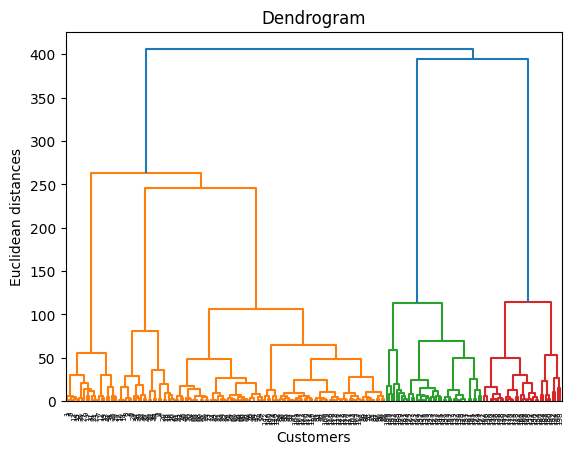

In [3]:
import scipy.cluster.hierarchy as sch

dendogram = sch.dendrogram(sch.linkage(X, method='ward'))

plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

## Training

### Training the K-means model on the Training set

In [6]:
from sklearn.cluster import AgglomerativeClustering

hc = AgglomerativeClustering(n_clusters = 5, metric= 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(X)

## Visualisation

### Visualising the clusters

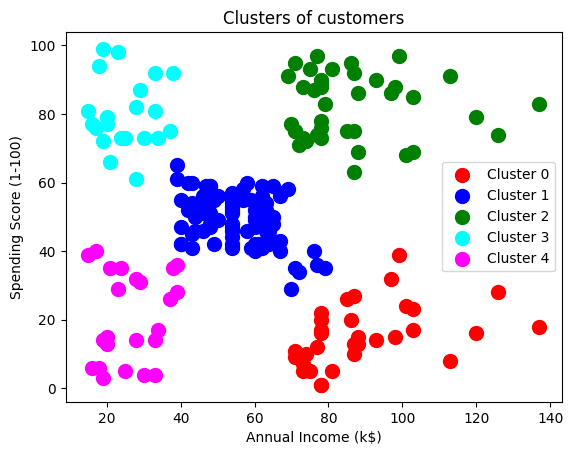

In [7]:
colors = ['red', 'blue', 'green', 'cyan', 'magenta']

for i in range(5):
    label = 'Cluster '+str(i)
    plt.scatter(X[y_hc == i]['income'], X[y_hc == i]['spending'], s = 100, c = colors[i], label = label)

plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()